In [1]:
import numpy as np, analysis as ana, prjlib, basic, plottools as pl
from matplotlib.pyplot import *

In [2]:
# baseline
Lmin = 20
mb, __, __ = prjlib.binning_all(10,lmin=Lmin,Lsp=2048)
p0, __ = prjlib.filename_init(PSA='s14&15_deep56',stype='lcmb',doreal='True',dearot='True',rlmin='200')
ocb0 = prjlib.binned_cl(p0.quad.f['EB'].ocls,mb)
scb0 = prjlib.binned_cl_rlz(p0.quad.f['EB'].cl,0,200,mb)

300,2048
-1.9 0.69 5.9 0.8
200,1948
1.6 0.36 11.6 0.315
200,2148
-4.9 0.91 9.7 0.56


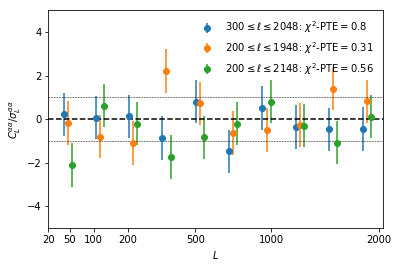

In [3]:
pl.plot_1dstyle(frac=True,spc='p2',ylab=r'$C_L^{\alpha\alpha}/\sigma_L^{\alpha\alpha}$',xmin=Lmin)
dat = {}
for i, (rlmin, rlmax) in enumerate([('300','2048'),('200','1948'),('200','2148')]):
    p1, __ = prjlib.filename_init(PSA='s14&15_deep56',stype='lcmb',doreal='True',dearot='True',rlmin=rlmin,rlmax=rlmax)
    docb = prjlib.binned_cl(p1.quad.f['EB'].ocls,mb) - ocb0
    dscb = prjlib.binned_cl_rlz(p1.quad.f['EB'].cl,0,200,mb) - scb0
    dat[i] = dscb
    dmcb = np.mean(dscb,axis=0)
    dvcb = np.std(dscb,axis=0)
    print(str(rlmin)+','+str(rlmax))
    st = ana.PTEs(docb,dscb)
    Label = r'$'+str(rlmin)+'\leq \ell\leq'+str(rlmax)+'$: $\chi^2$-PTE$='+str(st.px2)[:4]+'$'
    errorbar(np.sqrt(mb.bc)+0.5*(i-1),(docb-dmcb)/dvcb,yerr=dvcb/dvcb,fmt='o',label=Label)

legend(loc=0,frameon=False)
#savefig('fig_specjack.png')

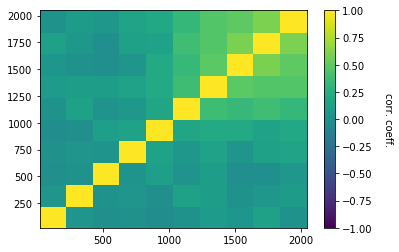

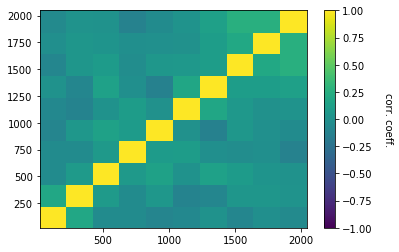

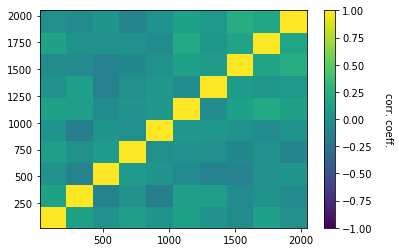

In [4]:
for i in range(3):
    pl.plot_corr(dat[i],20,2048,clab='corr. coeff.')